## Tesouro Direto

Analisando os dados dos títulos públicos federais do TESOURO DIRETO com PYTHON. Exemplos de gráficos com Tesouro Selic, Tesouro Pré-fixado, Tesoudo IPCA+. 

E também informações sobre o volume total de vendas do Tesouro Direto, bem como, o quantitatvo de Recompras (Resgates) do Tesouro Selic.

Ao final um comparativo entre os resgates do Tesouro Selic e variação semanal do Índice Bovespa.

Base de Dados: https://www.tesourotransparente.gov.br/ckan/dataset

### Taxas dos Títulos Ofertados pelo Tesouro Direto

As taxas e preços dos títulos ofertados pelo Tesouro Direto refletem o mercado secundário de títulos públicos federais. Dessa forma, o investidor pessoa física pode ter acesso aos títulos públicos por meio do Tesouro Direto e saber quais são as taxas e preços de compra e venda praticados em cada dia.

Listagem de preços e taxas dos títulos ofertados pelo Tesouro Direto. A lista é diária.

**Frequência:** Atualização diária

### Vendas do Tesouro Direto

Volume de vendas diário do programa Tesouro Direto. Os dados de vendas são apresentados também por tipo de título e por data de vencimento do título. No Tesouro Direto não são mais vendidos títulos com prazo de vencimento inferior a 1 ano.

Volume de vendas diário do Tesouro Direto. As vendas estão listadas por dia e por título. Os dados têm defasagem de dois dias úteis da data atual.

**Frequência:** Atualização diária com dados até dois dias antes à data do arquivo.

### Resgates do Tesouro Direto

Volume financeiro de resgates ocorridos no Tesouro Direto em determinado mês. Os resgates são divididos em três grupos, os títulos recomprados antecipadamente, os que foram carregados até o seu vencimento e os pagamentos de cupons semestrais de juros. O arquivo de Recompras disponibiliza listagem dos títulos que foram entregues pelo investidor antes do vencimento dos mesmos. O arquivo de Vencimentos lista os lançamentos referentes aos títulos que foram levados até a sua data de vencimento. Já o arquivo de Cupom de Juros relaciona os pagamentos de juros semestrais aos quais alguns títulos dão direito.

**Recompras do Tesouro Direto**



Listagem dos títulos que foram entregues pelo investidor antes do vencimento. Estão listados por dia e por título.

**Frequência:** Atualização diária com dados até dois dias antes à data do arquivo.

## Importações e Configurações Iniciais

In [1]:
import pandas as pd
pd.set_option("display.max_colwidth", 150)
pd.set_option("display.min_rows", 20)

import matplotlib
matplotlib.style.use('seaborn-darkgrid')
matplotlib.rcParams['figure.figsize'] = (18,8)

import plotly.graph_objects as go
import plotly.express as px

In [ ]:
!pip install yfinance
import yfinance as yf

In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

## 1. Funções para Busca e Tratamento de Dados do Tesouro Direto

In [4]:
def busca_titulos_tesouro_direto():
  url = 'https://www.tesourotransparente.gov.br/ckan/dataset/df56aa42-484a-4a59-8184-7676580c81e3/resource/796d2059-14e9-44e3-80c9-2d9e30b405c1/download/PrecoTaxaTesouroDireto.csv'
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Data Vencimento'] = pd.to_datetime(df['Data Vencimento'], dayfirst=True)
  df['Data Base']       = pd.to_datetime(df['Data Base'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

In [5]:
def busca_vendas_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f0468ecc-ae97-4287-89c2-6d8139fb4343/resource/e5f90e3a-8f8d-4895-9c56-4bb2f7877920/download/VendasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Venda']       = pd.to_datetime(df['Data Venda'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

In [6]:
def busca_recompras_tesouro():
  url = "https://www.tesourotransparente.gov.br/ckan/dataset/f30db6e4-6123-416c-b094-be8dfc823601/resource/30c2b3f5-6edd-499a-8514-062bfda0f61a/download/RecomprasTesouroDireto.csv"
  df  = pd.read_csv(url, sep=';', decimal=',')
  df['Vencimento do Titulo'] = pd.to_datetime(df['Vencimento do Titulo'], dayfirst=True)
  df['Data Resgate']       = pd.to_datetime(df['Data Resgate'], dayfirst=True)
  multi_indice = pd.MultiIndex.from_frame(df.iloc[:, :3])
  df = df.set_index(multi_indice).iloc[: , 3:]  
  return df

## 2.Preços e Taxas Históricas dos Títulos Negociados

Essa conjunto de dados contém as taxas e preços dos títulos ofertados pelo Tesouro Direto. Refletem o mercado secundário de títulos públicos federais.

### 2.1 Buscando dados

In [7]:
titulos = busca_titulos_tesouro_direto()

In [8]:
titulos.sort_index(inplace=True)
titulos

Taxa Compra Manha  ...  PU Base Manha
Tipo Titulo                        Data Vencimento Data Base                      ...               
Tesouro IGPM+ com Juros Semestrais 2005-07-01      2004-12-31               9.23  ...        1827.87
                                                   2005-01-03               9.23  ...        1776.51
                                                   2005-01-04               9.26  ...        1777.32
                                                   2005-01-05               9.28  ...        1778.20
                                                   2005-01-06               9.31  ...        1779.01
                                                   2005-01-07               9.87  ...        1775.73
                                                   2005-01-10              10.14  ...        1775.59
                                                   2005-01-11              10.26  ...        1775.79
                                                   2005-01-12              10.89  ...        1771.45
                                                   2005-01-13              10.89  ...        1772.52
...                                                                          ...  ...            ...
Tesouro Selic                      2027-03-01      2021-07-01               0.30  ...       10708.49
                                                   2021-07-02               0.30  ...       10711.31
                                                   2021-07-05               0.30  ...       10713.71
                                                   2021-07-06               0.30  ...       10715.64
                                                   2021-07-07               0.30  ...       10718.03
                                                   2021-07-08               0.30  ...       10719.96
                                                   2021-07-12               0.30  ...       10723.49
                                                   2021-07-13               0.30  ...       10725.36
                                                   2021-07-14               0.30  ...       10728.42
                                                   2021-07-15               0.29  ...       10732.63

[116692 rows x 5 columns]

In [17]:
tipos_titulos = titulos.index.droplevel(level=1).droplevel(level=1).drop_duplicates().to_list()
tipos_titulos

['Tesouro IGPM+ com Juros Semestrais',
 'Tesouro IPCA+',
 'Tesouro IPCA+ com Juros Semestrais',
 'Tesouro Prefixado',
 'Tesouro Prefixado com Juros Semestrais',
 'Tesouro Selic']

### 2.2 Tesouro Selic

In [10]:
selic2027 = titulos.loc[('Tesouro Selic', '2027-03-01')]
selic2027

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2021-02-08,0.32,0.33,10576.87,10570.51,10569.54
2021-02-09,0.32,0.33,10576.96,10570.61,10569.64
2021-02-10,0.32,0.33,10574.59,10568.24,10567.27
2021-02-11,0.33,0.34,10574.56,10568.22,10567.25
2021-02-12,0.33,0.34,10574.79,10568.45,10567.48
2021-02-17,0.33,0.34,10575.34,10569.00,10568.03
2021-02-18,0.33,0.34,10575.51,10569.18,10568.21
2021-02-19,0.33,0.34,10574.98,10568.65,10567.68
2021-02-22,0.33,0.34,10574.13,10567.81,10566.84


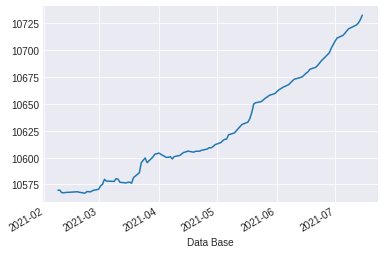

In [11]:
selic2027['PU Base Manha'].plot();

### 2.3 Pré-fixado 2023

In [18]:
pre2023 = titulos.loc[('Tesouro Prefixado', '2023-01-01')]
pre2023

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2016-01-26,16.59,16.65,346.72,345.49,345.28
2016-01-27,16.32,16.38,352.52,351.27,351.06
2016-01-28,16.42,16.48,350.65,349.41,349.20
2016-01-29,15.93,15.99,361.21,359.92,359.71
2016-02-01,15.89,15.95,362.28,360.99,360.78
2016-02-02,15.62,15.68,368.36,367.04,366.83
2016-02-03,15.90,15.96,362.49,361.20,360.99
2016-02-04,15.73,15.79,366.38,365.07,364.86
2016-02-05,15.99,16.05,360.98,359.70,359.49


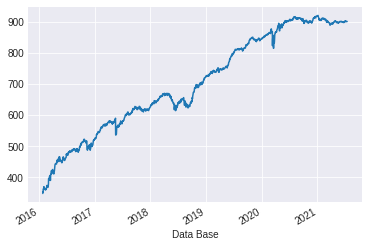

In [19]:
pre2023['PU Compra Manha'].plot();

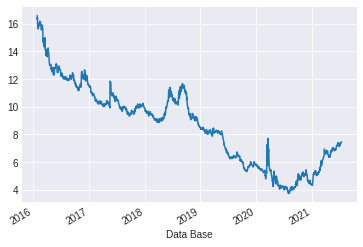

In [20]:
pre2023['Taxa Compra Manha'].plot();

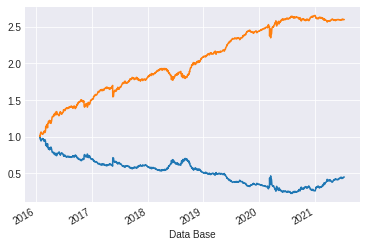

In [21]:
(pre2023['Taxa Compra Manha'] / pre2023['Taxa Compra Manha'].iloc[0]).plot();
(pre2023['PU Compra Manha'] / pre2023['PU Compra Manha'].iloc[0]).plot();

### 2.4 Pré-fixado 2026

In [22]:
pre2026 = titulos.loc[('Tesouro Prefixado', '2026-01-01')]
pre2026

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,6.36,6.48,696.02,691.42,691.25
2020-02-11,6.26,6.38,700.05,695.42,695.25
2020-02-12,6.22,6.34,701.76,697.13,696.96
2020-02-13,6.28,6.40,699.61,695.00,694.82
2020-02-14,6.23,6.35,701.71,697.08,696.91
2020-02-17,6.19,6.31,703.43,698.79,698.62
2020-02-18,6.21,6.33,702.82,698.19,698.02
2020-02-19,6.24,6.36,701.83,697.21,697.04
2020-02-20,6.21,6.33,703.16,698.53,698.36


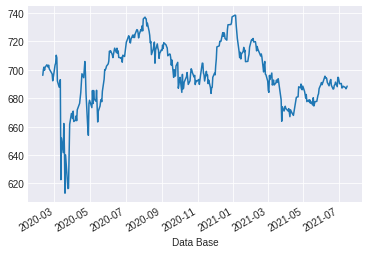

In [23]:
pre2026['PU Compra Manha'].plot();

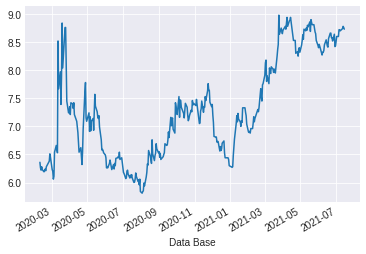

In [24]:
pre2026['Taxa Compra Manha'].plot();

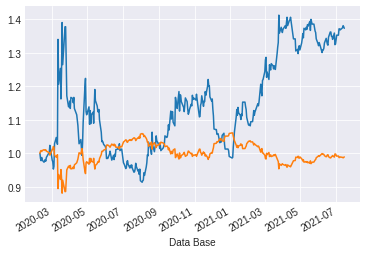

In [25]:
(pre2026['Taxa Compra Manha'] / pre2026['Taxa Compra Manha'].iloc[0]).plot();
(pre2026['PU Compra Manha'] / pre2026['PU Compra Manha'].iloc[0]).plot();

### 2.5 Pré-fixado 2031 com Juros Semestrais

In [26]:
pre2031 = titulos.loc[('Tesouro Prefixado com Juros Semestrais', '2031-01-01')]
pre2031

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,6.69,6.81,1257.57,1247.33,1247.00
2020-02-11,6.57,6.69,1268.26,1257.90,1257.57
2020-02-12,6.56,6.68,1269.45,1259.08,1258.76
2020-02-13,6.64,6.76,1262.85,1252.56,1252.23
2020-02-14,6.56,6.68,1270.09,1259.73,1259.40
2020-02-17,6.54,6.66,1272.15,1261.77,1261.45
2020-02-18,6.59,6.71,1268.13,1257.80,1257.48
2020-02-19,6.63,6.75,1265.00,1254.71,1254.39
2020-02-20,6.62,6.74,1266.18,1255.89,1255.56


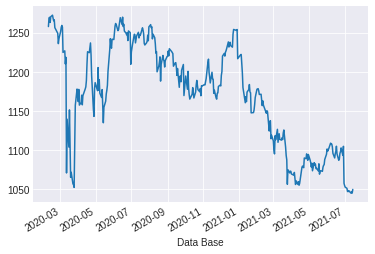

In [27]:
pre2031['PU Compra Manha'].plot();

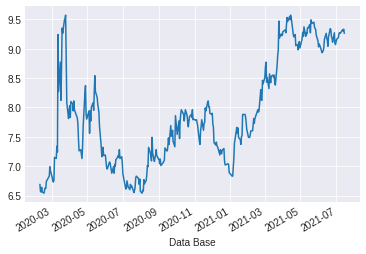

In [28]:
pre2031['Taxa Compra Manha'].plot();

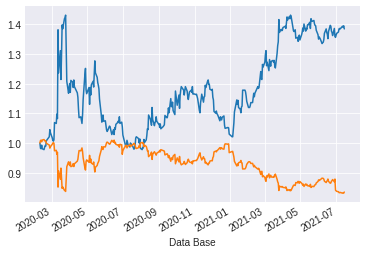

In [29]:
(pre2031['Taxa Compra Manha'] / pre2031['Taxa Compra Manha'].iloc[0]).plot();
(pre2031['PU Compra Manha'] / pre2031['PU Compra Manha'].iloc[0]).plot();

### 2.6 Tesouro IPCA+ 2026

In [30]:
ipca2026 = titulos.loc[('Tesouro IPCA+', '2026-08-15')]
ipca2026

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,2.65,2.77,2785.55,2764.50,2764.01
2020-02-11,2.58,2.70,2798.39,2777.24,2776.76
2020-02-12,2.56,2.68,2802.40,2781.23,2780.75
2020-02-13,2.58,2.70,2799.33,2778.20,2777.72
2020-02-14,2.54,2.66,2807.15,2785.97,2785.22
2020-02-17,2.49,2.61,2816.44,2795.20,2794.77
2020-02-18,2.53,2.65,2809.76,2788.58,2788.15
2020-02-19,2.56,2.68,2804.86,2783.74,2783.31
2020-02-20,2.50,2.62,2815.90,2794.70,2794.28


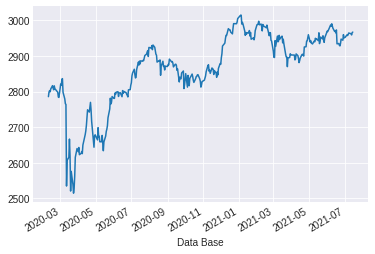

In [31]:
ipca2026['PU Compra Manha'].plot();

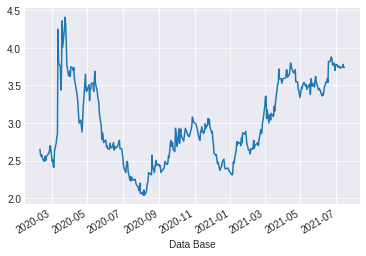

In [32]:
ipca2026['Taxa Compra Manha'].plot();

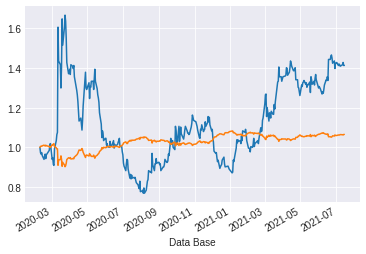

In [33]:
(ipca2026['Taxa Compra Manha'] / ipca2026['Taxa Compra Manha'].iloc[0]).plot();
(ipca2026['PU Compra Manha'] / ipca2026['PU Compra Manha'].iloc[0]).plot();

### 2.7 Tesouro IPCA+ 2035

In [34]:
ipca2035 = titulos.loc[('Tesouro IPCA+', '2035-05-15')]
ipca2035

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2010-03-08,6.23,6.33,415.52,405.82,405.61
2010-03-09,6.25,6.35,413.78,404.12,403.91
2010-03-10,6.25,6.35,413.99,404.33,404.12
2010-03-11,6.25,6.35,414.20,404.54,404.33
2010-03-12,6.27,6.37,412.69,403.07,402.82
2010-03-15,6.28,6.38,411.87,402.27,402.12
2010-03-16,6.27,6.37,413.00,403.37,403.22
2010-03-17,6.26,6.36,414.13,404.47,404.32
2010-03-18,6.26,6.36,414.28,404.62,404.47


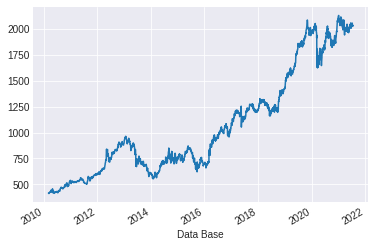

In [35]:
ipca2035['PU Compra Manha'].plot();

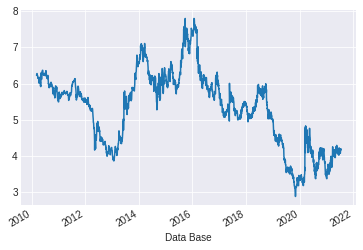

In [36]:
ipca2035['Taxa Compra Manha'].plot();

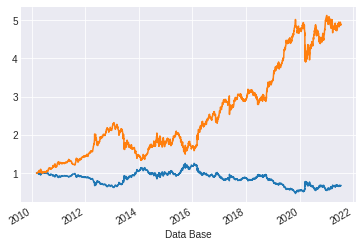

In [37]:
(ipca2035['Taxa Compra Manha'] / ipca2035['Taxa Compra Manha'].iloc[0]).plot();
(ipca2035['PU Compra Manha'] / ipca2035['PU Compra Manha'].iloc[0]).plot();

### 2.8 Tesouro IPCA+ 2045

In [38]:
ipca2045 = titulos.loc[('Tesouro IPCA+', '2045-05-15')]
ipca2045

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2017-02-08,5.34,5.46,685.78,664.14,663.92
2017-02-09,5.27,5.39,698.96,676.90,676.67
2017-02-10,5.21,5.33,710.67,688.23,687.84
2017-02-13,5.21,5.33,710.90,688.46,688.23
2017-02-14,5.22,5.34,709.23,686.85,686.62
2017-02-15,5.22,5.34,709.49,687.10,686.85
2017-02-16,5.25,5.37,704.09,681.88,681.62
2017-02-17,5.32,5.44,691.53,669.73,669.25
2017-02-20,5.27,5.39,701.09,678.98,678.73


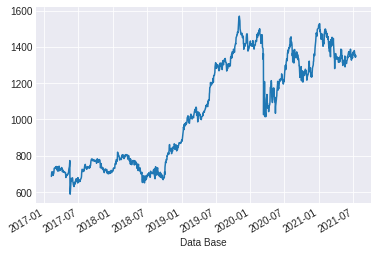

In [39]:
ipca2045['PU Compra Manha'].plot();

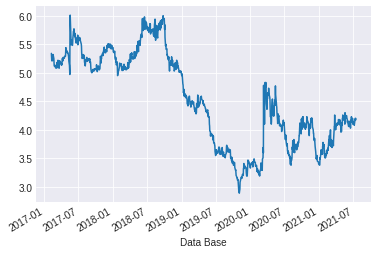

In [40]:
ipca2045['Taxa Compra Manha'].plot();

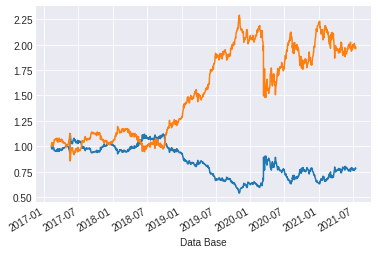

In [41]:
(ipca2045['Taxa Compra Manha'] / ipca2045['Taxa Compra Manha'].iloc[0]).plot();
(ipca2045['PU Compra Manha'] / ipca2045['PU Compra Manha'].iloc[0]).plot();

### 2.9 Tesouro IPCA+ 2055 com Juros Semestrais

In [42]:
ipca2055 = titulos.loc[('Tesouro IPCA+ com Juros Semestrais', '2055-05-15')]
ipca2055

,Taxa Compra Manha,Taxa Venda Manha,PU Compra Manha,PU Venda Manha,PU Base Manha
Data Base,,,,,
2020-02-10,3.42,3.54,5063.37,4956.73,4955.71
2020-02-11,3.36,3.48,5119.00,5010.64,5009.63
2020-02-12,3.36,3.48,5120.02,5011.66,5010.64
2020-02-13,3.40,3.52,5084.54,4977.32,4976.30
2020-02-14,3.37,3.49,5113.38,5005.31,5003.81
2020-02-17,3.34,3.46,5141.86,5032.93,5032.01
2020-02-18,3.37,3.49,5115.22,5007.16,5006.23
2020-02-19,3.37,3.49,5116.14,5008.08,5007.16
2020-02-20,3.34,3.46,5144.62,5035.70,5034.77


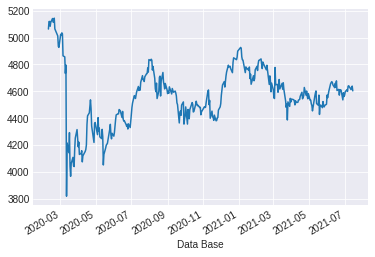

In [43]:
ipca2055['PU Compra Manha'].plot();

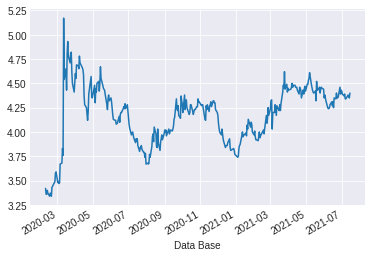

In [44]:
ipca2055['Taxa Compra Manha'].plot();

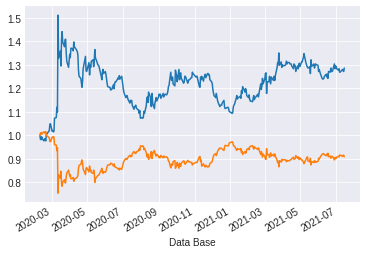

In [45]:
(ipca2055['Taxa Compra Manha'] / ipca2055['Taxa Compra Manha'].iloc[0]).plot();
(ipca2055['PU Compra Manha'] / ipca2055['PU Compra Manha'].iloc[0]).plot();

## 3. Vendas Tesouro Direto

Este conjunto de dados traz o volume de vendas diário do programa Tesouro Direto.

### 3.1 Buscando Dados

In [46]:
vendas = busca_vendas_tesouro()

In [47]:
vendas.sort_index(inplace=True)
vendas

PU  ...        Valor
Tipo Titulo                        Vencimento do Titulo Data Venda                ...             
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2002-01-07   1038.150000  ...      7682.31
                                                        2002-01-08   1035.590000  ...      6213.54
                                                        2002-01-09   1035.400000  ...       207.08
                                                        2002-01-14   1038.166666  ...       622.89
                                                        2002-01-15   1038.640000  ...      1038.64
                                                        2002-01-16   1039.052173  ...     19118.55
                                                        2002-01-17   1039.269911  ...     23487.49
                                                        2002-01-18   1039.259574  ...      9769.03
                                                        2002-01-21   1039.720000  ...     12476.64
                                                        2002-01-22   1040.189743  ...      8113.47
...                                                                          ...  ...          ...
Tesouro Selic                      2027-03-01           2021-06-30  10709.802579  ...  21411465.70
                                                        2021-07-01  10713.104142  ...  29500889.13
                                                        2021-07-02  10716.410571  ...  26503397.96
                                                        2021-07-05  10719.233150  ...  29157278.89
                                                        2021-07-06  10721.619955  ...  27698018.55
                                                        2021-07-07  10723.551245  ...  26086110.75
                                                        2021-07-08  10725.937514  ...  24199860.21
                                                        2021-07-12  10729.760628  ...  23191841.10
                                                        2021-07-13  10731.401854  ...  32834226.36
                                                        2021-07-14  10733.253448  ...  23644176.68

[65951 rows x 3 columns]

### 3.2 Gráficos

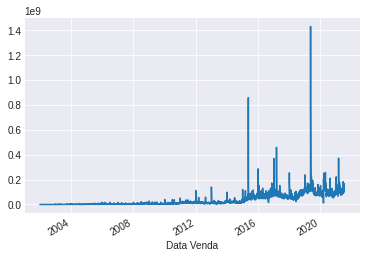

In [48]:
vendas['Valor'].groupby('Data Venda').sum().plot();

## 4. Recompras Tesouro Direto

Esse conjunto da dados contém listagem dos títulos que foram entregues pelo investidor antes do vencimento. Estão listados por dia e por título. Frequência: Atualização diária com dados até dois dias antes à data do arquivo.

### 4.1 Buscando Dados

In [49]:
recompras = busca_recompras_tesouro()

In [50]:
recompras.sort_index(inplace=True)
recompras

Quantidade       Valor
Tipo Titulo                        Vencimento do Titulo Data Resgate                        
Tesouro IGPM+ com Juros Semestrais 2005-07-01           2005-01-13          2.00     3545.04
                                                        2005-02-03          1.00     1783.97
                                                        2005-03-03          2.00     3595.96
                                                        2005-03-10          1.00     1803.81
                                                        2005-03-24          0.20      364.14
                                                        2005-03-31          0.60     1098.15
                                                        2005-04-14          3.60     6666.62
                                                        2005-04-22         36.00    66912.84
                                                        2005-06-02          6.40    11999.94
                                   2005-12-01           2005-01-06        141.20   249321.07
...                                                                          ...         ...
Tesouro Selic                      2027-03-01           2021-06-30        622.53  6663414.27
                                                        2021-07-01        591.83  6336768.55
                                                        2021-07-02        827.60  8863915.53
                                                        2021-07-05        392.71  4207182.27
                                                        2021-07-06        577.17  6184724.22
                                                        2021-07-07        441.95  4736613.75
                                                        2021-07-08        677.84  7266393.37
                                                        2021-07-12        306.04  3281895.88
                                                        2021-07-13        787.43  8445496.62
                                                        2021-07-14        432.38  4638249.30

[45613 rows x 2 columns]

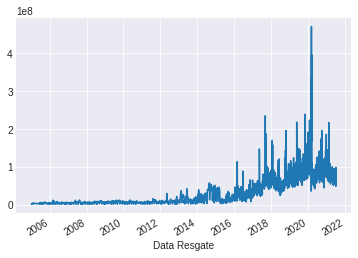

In [51]:
recompras['Valor'].groupby('Data Resgate').sum().plot();

### 4.2 Recompras diárias Tesouro Selic 2025

In [52]:
recompras_selic = recompras.loc[('Tesouro Selic', '2025-03-01')]

In [53]:
fig = px.bar(data_frame=recompras_selic,  x=recompras_selic.index, y='Valor', labels={'x':'Data'})
fig.show()

In [54]:
recompras_selic_semanal = recompras_selic.resample('W').sum()

In [55]:
fig = px.bar(data_frame=recompras_selic_semanal,  x=recompras_selic_semanal.index, y='Valor' )
fig.show()

### 4.3 Resgastes Tesouro Selic vs Índice Bovespa

In [56]:
ibov = yf.download('^BVSP')['Adj Close'].resample('W').last().pct_change()[1:]

[*********************100%***********************]  1 of 1 completed


In [57]:
selic_ibov = pd.concat([recompras_selic_semanal['Valor'].pct_change()[1:], ibov], axis=1).dropna()[1:]
selic_ibov.columns = ['Recompra(%)', 'IBOV(%)']
selic_ibov

,Recompra(%),IBOV(%)
Date,,
2019-02-24,0.236251,0.003691
2019-03-03,0.423072,-0.033529
2019-03-10,-0.219953,0.008044
2019-03-17,1.231367,0.039553
2019-03-24,0.179772,-0.054490
2019-03-31,0.579274,0.017923
2019-04-07,-0.185600,0.017744
2019-04-14,0.124599,-0.043591
2019-04-21,0.030708,0.018336


In [58]:
fig = go.Figure(data=[
    go.Bar(name='Recompras Selic(%)', x=selic_ibov.index,  y=selic_ibov['Recompra(%)']),
    go.Bar(name='IBOV(%)', x=selic_ibov.index,  y=selic_ibov['IBOV(%)']),
])
fig.update_layout(barmode='group')
fig.show()

In [59]:
selic_ibov.corr()

,Recompra(%),IBOV(%)
Recompra(%),1.000000,-0.211668
IBOV(%),-0.211668,1.000000
